In [ ]:
file_paths = [
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e001_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e002_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e003_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e004_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e005_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e006_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e007_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e008_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e009_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e010_resnet50_images_230904_prediction.csv'
]

In [ ]:
import pandas as pd
import numpy as np
import re  #Regular Expression

def extract_threshold_epsilon(file_path):
    threshold_match = re.search(r"_t(\d+)", file_path)
    epsilon_match = re.search(r"_e(\d+)", file_path)

    if threshold_match and epsilon_match:
        threshold = float(threshold_match.group(1)[0] + "." + threshold_match.group(1)[1:])
        epsilon = float("0." + epsilon_match.group(1))
    else:
        raise ValueError("Could not extract threshold and epsilon from the file name.")

    return threshold, epsilon


def compare_probabilities(file_path, target_class):
    # threshold和epsilon
    threshold, epsilon = extract_threshold_epsilon(file_path)

    # 读取数据
    file_df = pd.read_csv(file_path)

    # 筛选目标类别 如果不筛选会出大问题。。。
    file_df = file_df[file_df['Class'] == target_class]
    # 筛选原始图片和不同扰动类型的图片
    original_df = file_df[file_df['ImageName'].str.endswith('.jpg')]
    rand_df = file_df[file_df['ImageName'].str.endswith('_rand.png')]
    seam_df = file_df[file_df['ImageName'].str.endswith('_seam.png')]
    only_fgsm_df = file_df[file_df['ImageName'].str.endswith('_only_fgsm.png')]
    seam_only_fgsm_df = file_df[file_df['ImageName'].str.endswith('_seam_only_fgsm.png')]

    # 提取basename
    original_df['Basename'] = original_df['ImageName'].str.extract(r'(.+)\.jpg')
    rand_df['Basename'] = rand_df['ImageName'].str.extract(r'(.+)_rand')
    seam_df['Basename'] = seam_df['ImageName'].str.extract(r'(.+)_seam')
    only_fgsm_df['Basename'] = only_fgsm_df['ImageName'].str.extract(r'(.+)_only_fgsm')
    seam_only_fgsm_df['Basename'] = seam_only_fgsm_df['ImageName'].str.extract(r'(.+)_seam_only_fgsm')

    # 原始图片中取概率最大的
    max_prob_original_df = original_df.loc[original_df.groupby('Basename')['Probability'].idxmax()]

    # 左连接扰动图片的概率
    result_df = max_prob_original_df
    for disturbance_df, suffix in zip([rand_df, seam_df, only_fgsm_df, seam_only_fgsm_df],
                                      ['_rand', '_seam', '_only_fgsm', '_seam_only_fgsm']):
        result_df = pd.merge(result_df, disturbance_df[['Basename', 'Probability']], on='Basename', how='left', suffixes=('', suffix))


    # 添加threshold和epsilon列
    result_df['threshold'] = threshold
    result_df['epsilon'] = epsilon

    return result_df



In [ ]:
# 使用示例
file_path = '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_Birds_t01_e001_resnet50_images_230903_prediction.csv'
target_class = 'jacamar'
result_df = compare_probabilities(file_path, target_class)
result_df

In [ ]:
# selected_bird_labels = [
#     "sparrow", "robin", "bluebird", "finch", "warbler", "titmouse",
#     "woodpecker", "oriole", "grosbeak", "goldfinch", "nuthatch",
#     "starling", "chickadee", "kingfisher", "wren", "pigeon", "crow",
#     "raven", "hawk", "eagle", "jay", "swallow", "magpie", "hummingbird",
#     "toucan", "parrot", "flamingo", "penguin", "ostrich", "peacock"
# ]

def combine_multiple_files(file_paths, target_class):
    # 使用列表推导式处理每个文件并收集结果
    all_results = [compare_probabilities(file_path, target_class) for file_path in file_paths]

    # 使用pd.concat垂直合并所有结果
    combined_df = pd.concat(all_results, ignore_index=True)

    return combined_df



file_paths = [
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e001_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e002_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e003_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e004_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e005_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e006_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e007_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e008_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e009_resnet50_images_230904_prediction.csv',
    '/content/drive/MyDrive/ds_aml_sylvia/resnet50/resnet50_goldfish_t01_e010_resnet50_images_230904_prediction.csv'
]
target_class='goldfish'
combined_df = combine_multiple_files(file_paths,target_class)
combined_df

<ipython-input-2-7b2ae3207157>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df['Basename'] = original_df['ImageName'].str.extract(r'(.+)\.jpg')
<ipython-input-2-7b2ae3207157>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rand_df['Basename'] = rand_df['ImageName'].str.extract(r'(.+)_rand')
<ipython-input-2-7b2ae3207157>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,ImageName,Class,Probability,Basename,Probability_rand,Probability_seam,Probability_only_fgsm,Probability_seam_only_fgsm,threshold,epsilon
0,n01443537_0.jpg,goldfish,0.017551,n01443537_0,0.001390,0.000324,0.015802,0.000060,0.1,0.001
1,n01443537_1.jpg,goldfish,0.861403,n01443537_1,0.000035,0.009044,0.000063,0.000465,0.1,0.001
2,n01443537_10.jpg,goldfish,0.999109,n01443537_10,0.000265,0.174477,0.000612,0.000759,0.1,0.001
3,n01443537_100.jpg,goldfish,0.581787,n01443537_100,0.000285,0.072552,0.000298,0.000150,0.1,0.001
4,n01443537_101.jpg,goldfish,0.999980,n01443537_101,0.000120,0.001146,0.000136,0.000039,0.1,0.001
...,...,...,...,...,...,...,...,...,...,...
5035,n01443537_95.jpg,goldfish,0.999999,n01443537_95,0.000019,0.000355,0.000230,0.000255,0.1,0.010
5036,n01443537_96.jpg,goldfish,0.999761,n01443537_96,0.000044,0.009706,0.000704,0.000208,0.1,0.010
5037,n01443537_97.jpg,goldfish,0.000028,n01443537_97,0.000056,0.000085,0.000014,0.000022,0.1,0.010
5038,n01443537_98.jpg,goldfish,0.986128,n01443537_98,0.003550,0.026833,0.000168,0.000080,0.1,0.010


In [ ]:
combined_df


,ImageName,Class,Probability,Probability_rand,Probability_seam,Probability_only_fgsm,Basename,Probability_seam_only_fgsm,threshold,epsilon
0,n01443537_0.jpg,robin,5.146684e-05,2.740593e-05,4.153468e-05,2.642686e-05,n01443537_0,6.496966e-06,0.1,0.001
1,n01443537_1.jpg,robin,5.791902e-07,6.345917e-06,2.453452e-05,2.527868e-06,n01443537_1,7.083087e-06,0.1,0.001
2,n01443537_10.jpg,robin,1.732527e-11,2.009073e-07,3.487699e-06,1.036002e-07,n01443537_10,4.276487e-07,0.1,0.001
3,n01443537_100.jpg,robin,2.543496e-08,3.000926e-07,3.038590e-05,1.441513e-07,n01443537_100,4.405838e-07,0.1,0.001
4,n01443537_101.jpg,robin,1.029737e-09,6.940768e-07,1.830981e-06,3.490489e-07,n01443537_101,1.193486e-06,0.1,0.001
...,...,...,...,...,...,...,...,...,...,...
499,n01443537_95.jpg,peacock,5.510124e-17,1.146537e-06,2.331723e-06,6.792562e-06,n01443537_95,8.498736e-06,0.1,0.010
500,n01443537_96.jpg,peacock,2.069274e-14,2.374299e-07,3.778454e-06,6.986103e-06,n01443537_96,6.643120e-06,0.1,0.010
501,n01443537_97.jpg,peacock,9.066654e-06,5.355509e-07,1.083538e-06,5.470523e-05,n01443537_97,1.368180e-05,0.1,0.010
502,n01443537_98.jpg,peacock,6.127864e-10,9.222003e-07,5.160318e-07,7.904055e-07,n01443537_98,5.776573e-06,0.1,0.010


#---

In [ ]:
unique_classes = combined_df['Class'].value_counts()
unique_classes

goldfish    5040
Name: Class, dtype: int64

<ipython-input-6-621a2a6efeae>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_probs = combined_df.groupby('epsilon').mean().reset_index()


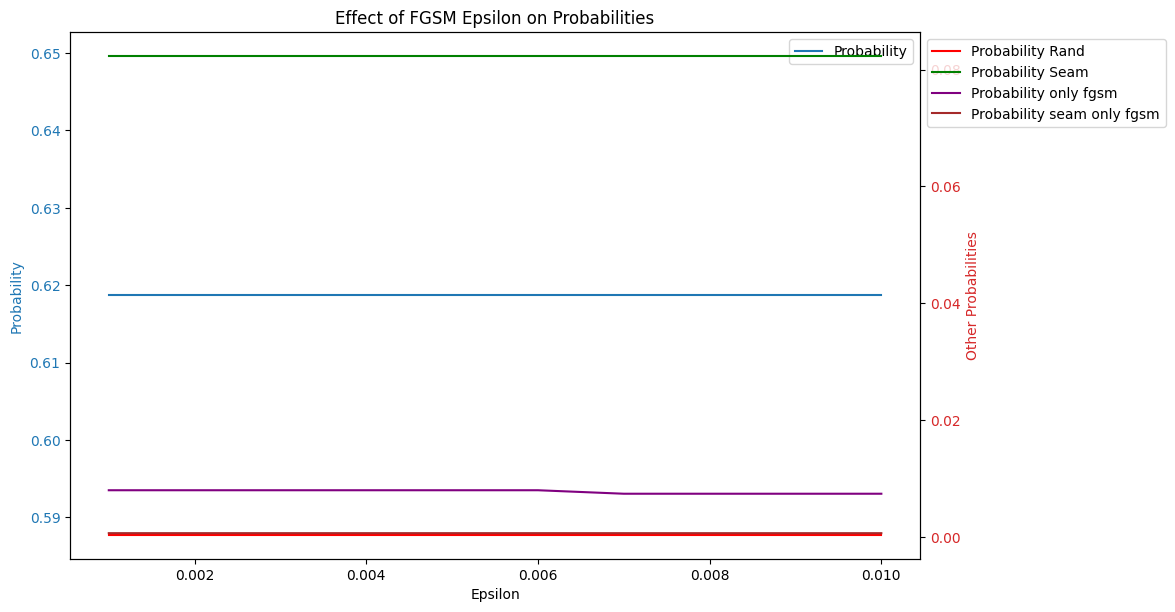

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每个epsilon的各种probability的平均值
avg_probs = combined_df.groupby('epsilon').mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# 使用左侧的纵坐标轴绘制probability
color = 'tab:blue'
ax1.set_xlabel('Epsilon')
ax1.set_ylabel('Probability', color=color)
sns.lineplot(data=avg_probs, x='epsilon', y='Probability', ax=ax1, label='Probability', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 使用右侧的纵坐标轴绘制其他类型的probability
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Other Probabilities', color=color)
sns.lineplot(data=avg_probs, x='epsilon', y='Probability_rand', ax=ax2, label='Probability Rand', color='red')
sns.lineplot(data=avg_probs, x='epsilon', y='Probability_seam', ax=ax2, label='Probability Seam', color='green')
sns.lineplot(data=avg_probs, x='epsilon', y='Probability_only_fgsm', ax=ax2, label='Probability only fgsm', color='purple')
sns.lineplot(data=avg_probs, x='epsilon', y='Probability_seam_only_fgsm', ax=ax2, label='Probability seam only fgsm', color='brown')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Effect of FGSM Epsilon on Probabilities')
plt.show()


In [ ]:
avg_probs

,epsilon,Probability,Probability_rand,Probability_seam,Probability_only_fgsm,Probability_seam_only_fgsm,threshold
0,0.001,0.618696,0.00045,0.082319,0.008065,0.000726,0.1
1,0.002,0.618696,0.00045,0.082319,0.008065,0.000726,0.1
2,0.003,0.618696,0.00045,0.082319,0.008065,0.000726,0.1
3,0.004,0.618696,0.00045,0.082319,0.008065,0.000726,0.1
4,0.005,0.618696,0.00045,0.082319,0.008065,0.000726,0.1
5,0.006,0.618696,0.00045,0.082319,0.008065,0.000726,0.1
6,0.007,0.618696,0.00045,0.082319,0.007468,0.000724,0.1
7,0.008,0.618696,0.00045,0.082319,0.007468,0.000724,0.1
8,0.009,0.618696,0.00045,0.082319,0.007468,0.000724,0.1
9,0.010,0.618696,0.00045,0.082319,0.007468,0.000724,0.1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每个epsilon的各种probability的平均值
avg_probs = combined_df.groupby('epsilon').mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# 使用左侧的纵坐标轴绘制probability
color = 'tab:blue'
ax1.set_xlabel('Seam_distortion')
ax1.set_ylabel('Probability', color=color)
sns.lineplot(data=avg_probs, x='epsilon', y='Probability', ax=ax1, label='Probability', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 使用右侧的纵坐标轴绘制其他类型的probability
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Other Probabilities', color=color)
sns.lineplot(data=avg_probs, x='threshold', y='Probability_rand', ax=ax2, label='Probability Rand', color='red')
sns.lineplot(data=avg_probs, x='threshold', y='Probability_seam', ax=ax2, label='Probability Seam', color='green')
sns.lineplot(data=avg_probs, x='threshold', y='Probability_only_fgsm', ax=ax2, label='Probability only fgsm', color='purple')
sns.lineplot(data=avg_probs, x='threshold', y='Probability_seam_only_fgsm', ax=ax2, label='Probability seam only fgsm', color='brown')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Effect of Seam_distortion on Probabilities')
plt.show()
